# Data Analysis 2025

## Boosting

### Learning Goals

+ Understand the fundamental idea of boosting as an ensemble learning method.
+ Differentiate boosting from other ensemble methods like bagging and stacking.
+ Explain the iterative nature of boosting and how it improves model performance.
+ Describe how AdaBoost (Adaptive Boosting) modifies instance weights at each iteration.
+ Explain how weak learners (e.g., decision stumps) are trained and combined.
+ Interpret the role of alpha (model weight) in adjusting weak learners’ influence.
+ Explain functional gradient descent and why boosting is an application of it.
+ Define residuals as gradients and explain why they guide model updates.
+ Understand how boosting fits weak learners to approximate gradients.
+ Apply boosting for different loss functions
+ Implement AdaBoost and Gradient Boosting using decision trees.
+ Interpret the effect of boosting on overfitting and generalization.
+ Use feature importance analysis to understand model decisions.

# Announcements

+ Clinic 2 is due today. How are we doing? Was it more difficult than Clinic 1?
+ Mid-course survey, fill it please https://forms.gle/nUAP8Lb4WmkQ62k36
+ Last lecture on Monday, March 10th, pick the content https://app.wooclap.com/UMDA?from=event-page
+ Anything else?

# Review of where we've been

<center>
<img width='80%' src="https://miro.medium.com/v2/resize:fit:1400/1*31IsgRs2QZ7H4kl8tNqjdQ.png"/><br/>
<small>
<a href="https://towardsdatascience.com/overview-of-supervised-machine-learning-algorithms-a5107d036296">Image source: 
Overview of Supervised Machine Learning Algorithms</a>
</small>
<center>

# Part 1: Boosting

We will look at ways in which multiple machine learning can be combined in a smarter way than bagging.

In particular, we will look at a way of combining models called *boosting*.

# Review: Overfitting

Overfitting is one of the most common failure modes of machine learning.
* An expressive model (e.g., polynomial) fits training data perfectly.
* But it makes incorrect test set predictions, and doesn't generalize.

# Review: Bagging

*Bagging* reduces *overfitting* by averaging many expressive models .

```python
for i in range(n_models):
    # collect data samples and fit models
    X_i, y_i = sample_with_replacement(X, y, n_samples)
    model = Model().fit(X_i, y_i)
    ensemble.append(model)

# output average prediction at test time:
y_test = ensemble.average_prediction(x_test)
```
<!-- Data samples taken with replacement are known as bootstrap samples. -->

# Review: Underfitting

Underfitting is another common problem in machine learning.
* The model is too simple to fit the data well.
* Training performance is low, hence test performance is low.

# Boosting

The idea of *boosting* is to reduce *underfitting* by combining models that correct each others' errors.

* As in bagging, we combine many models $g_t$ into one *ensemble* $f$.

* Unlike bagging, the $g_t$ are __small__ and tend to __underfit__.

* Each $g_t$ fits the points where the previous models made errors.

# Weak Learners

A key ingredient of a boosting algorithm is a *weak learner*.

* Intuitively, this is a model that is slightly better than random.
* Examples of weak learners include: small linear models, small decision trees 🌳 (when DTs are used with depth 1, they are called *stumps* 🌱).

# Structure of a Boosting Algorithm

Boosting reduces *underfitting* via models that correct each others' errors.

1. Compute weights $w^{(i)}$ for each data point $i$ based on $t$-th model predictions $f_t(x^{(i)})$ and targets $y^{(i)}$. Give more weight to points with errors.

3. Fit new weak learner $g_t$ on $\mathcal{D} = \{(x^{(i)}, y^{(i)})\}$ with weights $w^{(i)}$.

4. Set $f_{t+1} = f_t + \alpha_t g_t$ for some weight $\alpha_t$. Go to Step 1 and repeat.

In Python-like pseudocode this looks as follows:

```python
weights, ensemble = np.ones(n_data,), Ensemble([])
for i in range(n_models):
    model = SimpleBaseModel().fit(X, y, weights)
    predictions = ensemble.predict(X)
    model_weight, weights = update_weights(weights, predictions)
    ensemble.add(model, model_weight)

# output consensus prediction at test time:
y_test = ensemble.predict(y_test)
```

# Origins of Boosting

Boosting was initially developed in the 90s within theoretical ML.

* Boosting originally addressed a theoretical question: can weak learners (>50% accuracy) can be combined into a strong learner?

* This research led to a practical algorithm called *AdaBoost*.

There are now many types of boosting algorithms.

# Algorithm: AdaBoost

* __Type__: Supervised learning (classification).
* __Model family__: Ensembles of weak learners (often decision trees).
* __Objective function__: Exponential loss.
* __Optimizer__: Forward stagewise additive model building.

# Defining AdaBoost

One of the first practical boosting algorithms for classification problems was *AdaBoost*.

We start with uniform $w^{(i)} = 1/n$ and $f = 0$. Then for $t=1,2,...,T$:

1. Fit weak learner $g_t$ on $\mathcal{D}$ with weights $w^{(i)}$.
<br>
<br>
2. Compute misclassification error $e_t = \frac{\sum_{i=1}^n w^{(i)} \mathbb{I}\{y^{(i)} \neq f(x^{(i)})\}}{\sum_{i=1}^n w^{(i)}}$
<br>
<br>
3. Compute model weight $\alpha_t = \log[(1-e_t)/e_t]$. Set $f \gets f + \alpha_t g_t$.
<br>
<br>
4. Compute new data weights $w^{(i)} \gets w^{(i)}\exp[\alpha_t \mathbb{I}\{y^{(i)} \neq f(x^{(i)})\} ]$.

Depending on the weak learner (e.g. decision tree, logistic regression), *usually* I incoroporate the weights into the objective function of that model.

`sklearn` `fit` method has a parameter to allow us pass the weights, e.g.

```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train, sample_weight=weights)  # Pass weights here
```

# AdaBoost: An Example

Let's implement AdaBoost on a simple dataset to see what it can do.

Let's start by creating a classification dataset.

In [1]:
#adapted from https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html
import numpy as np
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

We can visualize this dataset using `matplotlib`.

/var/folders/0f/9ctnvkcn64374qd3h7bj1gth0000gn/T/ipykernel_2017/3921874894.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], cmap=plt.cm.Paired, s=60, edgecolor='k', label="Class %s" % n)


(-4.935097981925363, 8.848278359647372)

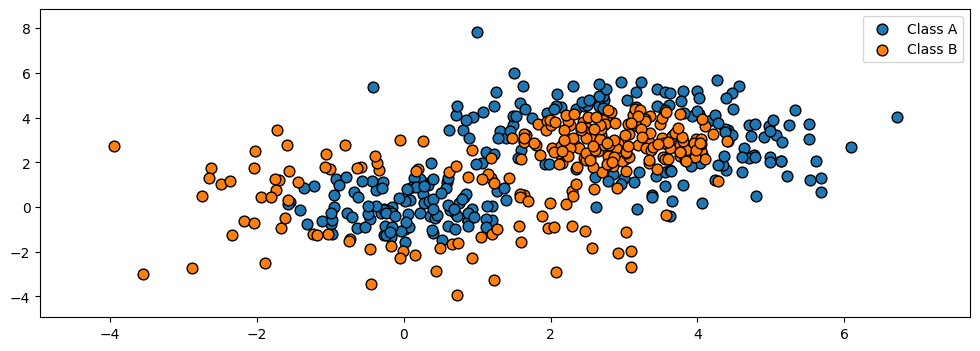

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

plot_colors, plot_step, class_names = "by", 0.02, "AB"
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
#    plt.scatter(X[idx, 0], X[idx, 1], color=c, s=60, edgecolor='k', label=f"Class {n}")
    plt.scatter(X[idx, 0], X[idx, 1], cmap=plt.cm.Paired, s=60, edgecolor='k', label="Class %s" % n)
plt.legend()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

Let's now train AdaBoost on this dataset.

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

Visualizing the output of the algorithm, we see that it can learn a highly non-linear decision boundary to separate the two classes.

/var/folders/0f/9ctnvkcn64374qd3h7bj1gth0000gn/T/ipykernel_2017/324831804.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], cmap=plt.cm.Paired, s=60, edgecolor='k', label="Class %s" % n)


(-4.935097981925363, 8.848278359647372)

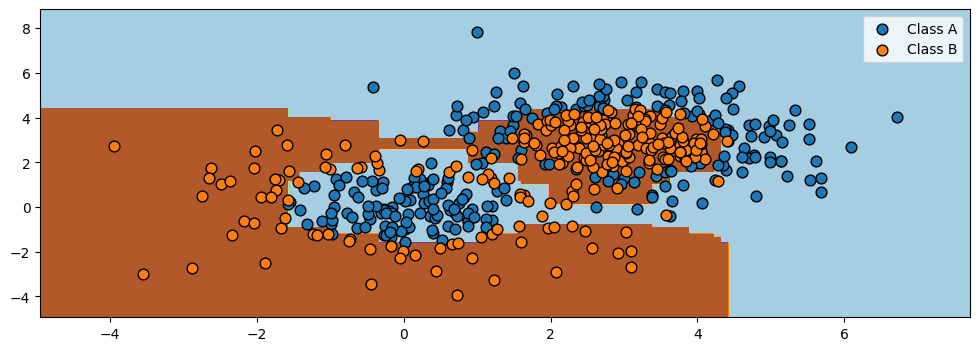

In [4]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

# plot decision boundary
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# plot training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
#    plt.scatter(X[idx, 0], X[idx, 1], cmap=cs, s=60, edgecolor='k', label="Class %s" % n)
    plt.scatter(X[idx, 0], X[idx, 1], cmap=plt.cm.Paired, s=60, edgecolor='k', label="Class %s" % n)
plt.legend()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Ensembling

Boosting and bagging are special cases of *ensembling*.

The idea of ensembling is to combine many models into one. 
* Bagging is a form of ensembling to reduce overfitting
* Boosting is a form of ensembling to reduce underfitting

# Pros and Cons of Boosting

Boosting algorithms generalize AdaBoost and offer many advantages:
* High accuracy via a highly expressive non-linear model family.
* Low pre-processing requirements if trees are used as weak learners.

Disadvantages include:
* Large ensembles can be expensive to train.
* The interpretability of the weak learners is lost.

# Summary: bagging vs boosting

<center>
<img width=70% src="https://miro.medium.com/v2/resize:fit:4800/format:webp/0*fdDu8RbNLoUzrrlF.jpeg"/><br/>
<small><a href="https://medium.com/@roshmitadey/bagging-v-s-boosting-be765c970fd1#:~:text=Bagging%3A%20Aims%20to%20create%20diverse,the%20weaknesses%20of%20its%20predecessors.">Image source: Bagging v/s Boosting</a></small>
</center>

# Part 2: Additive Models

Next, we are going to see another perspective on boosting and derive new boosting algorithms.

# Additive Models

Boosting can be seen as a way of fitting an *additive model*:
$$ f(x) = \sum_{t=1}^T \alpha_t g(x; \phi_t). $$

* $f(x)$ consists of $T$ smaller models $g$ with weights $\alpha_t$ & params $\phi_t$.

* The parameters are the $\alpha_t$ plus the parameters $\phi_t$ of each $g$.

Note that $g$ can be any model. If $g$ is non-linear in terms of $\phi_t$, so is $f$.

# Example: Boosting Algorithms

Boosting is one way of training additive models.

1. Compute weights $w^{(i)}$ for each data point $i$ based on $t$-th model predictions $f_t(x^{(i)})$ and targets $y^{(i)}$. Give more weight to points with errors.
2. Fit new weak learner $g_t$ on $\mathcal{D} = \{(x^{(i)}, y^{(i)})\}$ with weights $w^{(i)}$.
3. Set $f_{t+1} = f_t + \alpha_t g_t$ for some weight $\alpha_t$. Go to Step 1 and repeat.

# Forward Stagewise Additive Modeling

A general way to fit additive models is the forward stagewise approach.

* Suppose we have a loss $L : \mathcal{Y} \times \mathcal{Y} \to [0, \infty)$.

* Start with $f_0 = \arg \min_\phi \sum_{i=1}^n L(y^{(i)}, g(x^{(i)}; \phi))$.

* At each $t$, "freeze" $f_{t-1}$ and fit best new addition $\alpha_t g(x, \phi_t)$ to $f_{t-1}$:
$$ \alpha_t, \phi_t = \arg\min_{\alpha, \phi} \sum_{i=1}^n L(y^{(i)}, f_{t-1}(x^{(i)}) + \alpha g(x^{(i)}; \phi))$$

# Practical Considerations

* Popular choices of $g$ include simple decision trees (usually stumps) or simple polynomials (up to cubic splines).
* We may use a fixed number of iterations $T$ or early stopping when the error on a hold-out (validation) set no longer improves.
* An important design choice is the loss $L$.

# Exponential Loss

Give a binary classification problem with labels $\mathcal{Y} = \{-1, +1\}$, the exponential loss (if the prediction of my model is $f$) is defined as

$$ L(y, f) = \exp(-y \cdot f). $$

* When $y=1$, $L$ is small when $f \to \infty$.
* When $y=-1$, $L$ is small when $f \to - \infty$.

Let's visualize the exponential loss and compare it to other losses.

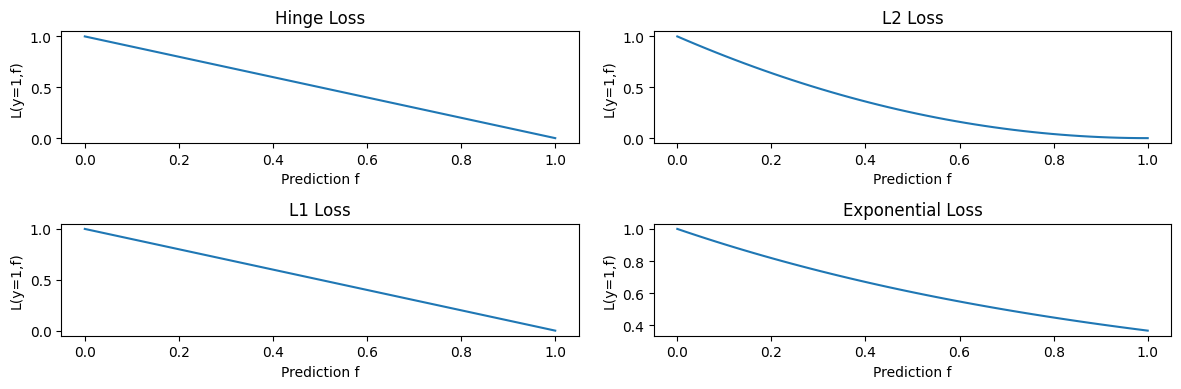

In [5]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [12, 4]

# define the losses for a target of y=1
losses = {
    'Hinge' : lambda f: np.maximum(1 - f, 0),
    'L2': lambda f: (1-f)**2,
    'L1': lambda f: np.abs(f-1),
    'Exponential': lambda f: np.exp(-f)
}

# plot them
f = np.linspace(0, 1)
fig, axes = plt.subplots(2,2)
for ax, (name, loss) in zip(axes.flatten(), losses.items()):
    ax.plot(f, loss(f))
    ax.set_title('%s Loss' % name)
    ax.set_xlabel('Prediction f')
    ax.set_ylabel('L(y=1,f)')
plt.tight_layout()

# Special Case: AdaBoost

AdaBoost is an instance of forward stagewise additive modeling with the exponential loss.

At each step $t$ we minimize
$$L_t = \sum_{i=1}^n e^{-y^{(i)}(f_{t-1}(x^{(i)}) + \alpha g(x^{(i)}; \phi))} = \sum_{i=1}^n w^{(i)} \exp\left(-y^{(i)}\alpha g(x^{(i)}; \phi)\right) $$
where $w^{(i)} = \exp(-y^{(i)}f_{t-1}(x^{(i)}))$ and we also made use of the handy rule that $e^{(a+b)} = e^a \cdot e^b$

We can derive the AdaBoost update rules from this equation.

Suppose that $g(y; \phi) \in \{-1,1\}$. With a bit of algebraic manipulations, we get that:
\begin{align*}
L_t & = e^{\alpha} \sum_{y^{(i)} \neq g(x^{(i)})} w^{(i)} + e^{-\alpha} \sum_{y^{(i)} = g(x^{(i)})} w^{(i)} \\
& = (e^{\alpha} - e^{-\alpha}) \sum_{i=1}^n w^{(i)} \mathbb{I}\{{y^{(i)} \neq g(x^{(i)})}\} + e^{-\alpha} \sum_{i=1}^n w^{(i)}.\\
\end{align*}
where $\mathbb{I}\{\cdot\}$ is the indicator function.

From there, we get that:
\begin{align*}
\phi_t & = \arg\min_{\phi} \sum_{i=1}^n w^{(i)} \mathbb{I}\{{y^{(i)} \neq g(x^{(i)}; \phi)}\} \\
\alpha_t & = \log[(1-e_t)/e_t]
\end{align*}
where $e_t = \frac{\sum_{i=1}^n w^{(i)} \mathbb{I}\{y^{(i)} \neq f(x^{(i)})\}}{\sum_{i=1}^n w^{(i)}\}}$.

These are update rules for AdaBoost, and it's not hard to show that the update rule for $w^{(i)}$ is the same as well.

# Example: Squared Loss

A popular choice for regression problems is the squared loss.
$$ L(y, f) = (y-f)^2. $$

The resulting algorithm is sometimes called L2Boost.

Recall that $f(x^{(i)})_{t} = f(x^{(i)})_{t-1} + \alpha g(x^{(i)}; \phi)$

At step $t$ we minimize

$$\sum_{i=1}^n (y^{(i)} - f(x^{(i)})_{t-1} - \alpha g(x^{(i)}; \phi) )^2 $$ or

$$\sum_{i=1}^n (r^{(i)}_t - \alpha g(x^{(i)}; \phi))^2, $$

where $r^{(i)}_t = y^{(i)} - f(x^{(i)})_{t-1}$ is the residual from the model $f_{t-1}$.

# Logistic Loss

Another common loss is the log-loss. When $\mathcal{Y}=\{-1,1\}$ it is defined as:

$$L(y, f) = \log(1+\exp(-2\cdot y\cdot f)).$$

This looks like the log of the exponential loss; it is less sensitive to outliers since it doesn't penalize large errors as much.

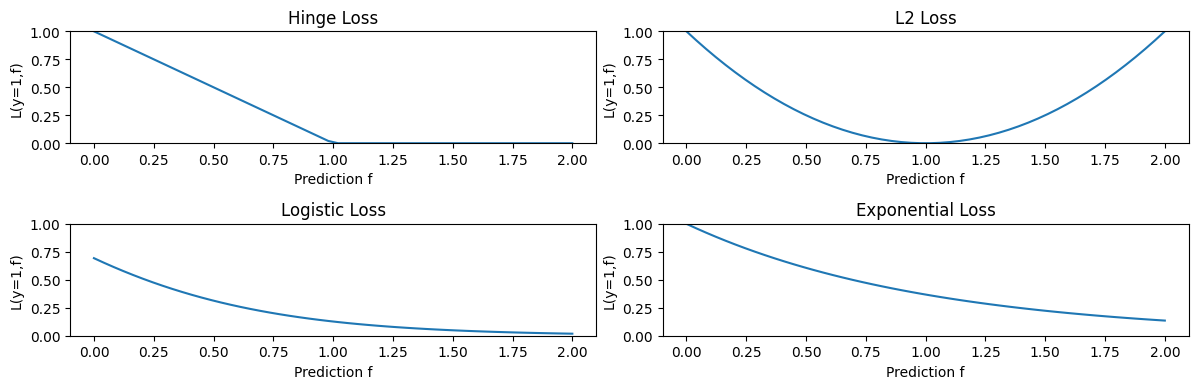

In [6]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [12, 4]

# define the losses for a target of y=1
losses = {
    'Hinge' : lambda f: np.maximum(1 - f, 0),
    'L2': lambda f: (1-f)**2,
    'Logistic': lambda f: np.log(1+np.exp(-2*f)),
    'Exponential': lambda f: np.exp(-f)
}

# plot them
f = np.linspace(0, 2)
fig, axes = plt.subplots(2,2)
for ax, (name, loss) in zip(axes.flatten(), losses.items()):
    ax.plot(f, loss(f))
    ax.set_title('%s Loss' % name)
    ax.set_xlabel('Prediction f')
    ax.set_ylabel('L(y=1,f)')
    ax.set_ylim([0,1])
plt.tight_layout()

In the context of boosting, we minimize
$$J(\alpha, \phi) = \sum_{i=1}^n \log\left(1+\exp\left(-2y^{(i)}(f_{t-1}(x^{(i)}) + \alpha g(x^{(i)}; \phi)\right)\right).$$

This gives a different weight update compared to AdaBoost. This algorithm is called LogitBoost.

# Facts About Additive Modeling

Boosting and additive models are closely connected.

* Forward stagewise training (FST) is a form of boosting with $g_t$

* Classical boosting algorithms (AdaBoost) are special cases of FST.

* Additive modeling is more general, supports many different losses. Additive modeling is a principled way of doing boosting for any loss $L$.

# What Do Weak Learners Learn?

Consider, for example, L2Boost, which optimizes the L2 loss.
<!-- $$ L(y, f) = \frac{1}{2}(y-f)^2. $$ -->

At step $t$ we minimize
$$\sum_{i=1}^n (r^{(i)}_t - \alpha g(x^{(i)}; \phi))^2, $$
where $r^{(i)}_t = y^{(i)} - f_{t-1}(x^{(i)})$ is the residual error of the model $f_{t-1}$.

The residual error of model $f_{t-1}$ is given by:
$$r^{(i)}_t = y^{(i)} - f_{t-1}(x^{(i)})$$

Note that $r_t^{(i)}$ is the derivative of the $L_2$ loss with respect to $f_{t-1}(x^{(i)})$:
$$\frac{1}{2}\left(y^{(i)} - f_{t-1}(x^{(i)})\right)^2$$

To be more precise, we can write this as:
$$r^{(i)}_t = \frac{\partial L(y^{(i)}, \text{f})}{\partial \text{f}} \bigg\rvert_{\text{f} = f_{t-1}(x^{(i)})}$$

Thus, at step $t$ we minimize
$$\sum_{i=1}^n \left( \underbrace{\left(y^{(i)} - f_{t-1}(x^{(i)})\right)}_\text{derivative of $L$ at $f_{t-1}(x^{(i)})$} - g(x^{(i)}; \phi)\right)^2. $$

So this tells us that L2Boost **fits the derivatives of the L2 loss**!

# Pros and Cons of Additive Models

The algorithms we have seen so far improve over AdaBoost.
* They optimize a wide range of objectives.
* They tend to be more robust to outliers and extend beyond classification.

Cons:
* Computational time is still an issue.
* Optimizing greedily over each $\phi_t$ can take time.
* Each loss requires specialized derivations.

# Part 3: Gradient Boosting

We are now going to see another way of deriving boosting algorithms that is inspired by (what else?) gradient descent.

# Limitations of Forward Stagewise Additive Modeling

Forward stagewise additive modeling is not without limitations.
* There may exist other losses for which it is complex to derive boosting-type weight update rules.
* At each step, we need to solve a (maybe costly) optimization problem over $\phi_t$.
* Optimizing each $\phi_t$ greedily may cause us to overfit.

### Supervised Learning: The Model

Recall that a machine learning model is a function
$$ f_\theta : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$. 

The model has a $d$-dimensional set of parameters $\theta$:
$$\theta = (\theta_1, \theta_2, ..., \theta_d). $$

We define a loss function (in general notation):

$$J(\theta) = \sum_{x \in \mathcal{X}} L\left(y, f_\theta(x) \right) 
$$



The gradient $\nabla J(\theta)$ is the $d$-dimensional vector of partial derivatives:

$$ \nabla J (\theta) = \begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_1} \\
\frac{\partial J(\theta)}{\partial \theta_2} \\
\vdots \\
\frac{\partial J(\theta)}{\partial \theta_d}
\end{bmatrix}.$$

The $j$-th entry of the vector $\nabla J (\theta)$ is the partial derivative $\frac{\partial J(\theta)}{\partial \theta_j}$ of $J$ with respect to the $j$-th component of $\theta$.

We can optimize $J(\theta)$ using gradient descent via the usual update rule:
$$\theta_t \gets \theta_{t-1} - \alpha_t \nabla J(\theta_{t-1}).$$

# Functional Optimization

Instead of optimizing $J(\theta)$, let's directly optimize $J(f)$ over *functions* $f$!

This requires a few simplifying assumptions (for now):

* The set $\mathcal{X}=\{x_1, ..., x_m\}$ of possible $x$ is finite and has size $m$.

* Thus, each $f(x)$ is a finite dimensional vector of size $m$.

In other words, we can view $f : \mathcal{X} \to \mathcal{Y}$ over a finite $\mathcal{X}$ as a vector in $\mathbb{R}^m$:

$$ f = \begin{bmatrix}
f_1 \\
f_2 \\
\vdots \\
f_m
\end{bmatrix}
= \begin{bmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_m)
\end{bmatrix}.$$

$f$ is an $m$-dimensional vector; its $j$-th component is the prediction $f(x_j)$.

# Supervised Learning Over Functions

Supervised learning becomes a functional optimization problem over
$$J(f) = \sum_{i=1}^n  L\left( y^{(i)}, f( x^{(i)}) \right)$$
where $f \in \mathbb{R}^m$ is a vector $L$ is a loss over a dataset $\{x^{(i)}, y^{(i)}\}_{i=1}^n$.


We can think of this as setting the parameters $\theta$ directly to values of $f$.

# Functional Gradients

How do we optimize $J(f)$ over $f$? 

$f$ is a finite-dimensional vector; thus we use the *functional gradient* of $J$:

$$ \nabla J(f)= \begin{bmatrix}
\frac{d J}{d f_1} \\
\frac{d J}{d f_2} \\
\vdots \\
\frac{d J}{d f_m} \\
\end{bmatrix}
= \begin{bmatrix}
\frac{d J}{d f(x_1)} \\
\frac{d J}{d f(x_2)} \\
\vdots \\
\frac{d J}{d f(x_m)} \\
\end{bmatrix}
$$

This is very similar to taking the gradient with respect to parameters $\theta$.

Let's further compare the parametric and the functional gradients.

* $\nabla J(\theta_0)$ tells how to modify $\theta_0$ to decrease $J$ at $J(\theta_0)$.

* $\nabla J(f_0)$ tells how to modify $f_0$ to decrease $J$ at $J(f_0)$.

# Functional Gradient Descent

How do we optimize the functional supervised learning objective?
$$J(f) = \sum_{i=1}^n  L\left( y^{(i)}, f( x^{(i)}) \right)$$

We perform gradient descent over $f$:
$$f_t \gets f_{t-1} - \alpha_t \nabla J(f_{t-1}).$$

This is analogous to regular gradient descent:
$$\theta_t \gets \theta_{t-1} - \alpha_t \nabla J(\theta_{t-1}).$$

This is best understood via a picture.

<center><img width=100% src="img/functional_gradient.png"></center>

After $T$ steps of $f_t \gets f_{t-1} - \alpha_t \nabla J(f_{t-1})$, we get a model of the form
$$f_T = \sum_{t=0}^{T-1} \alpha_t \nabla J(f_{t})$$

* Each $\nabla J(f_{t})$ is a function of $x$, thus so is $f_T$
* This also looks like an additive model!

# Problems With Functional Supervised Learning

However, in its current form, this approach is not practical.

* Typically $m = |\mathcal{X}|$ is very large (even infinite). Thus, we cannot estimate $\nabla J(f)$ everywhere.

* Even if we could, the model $f$ would be too expressive and overfit.

* We want a way to optimize $J(f)$ at *any* $n$ training data points

# Approximating Functional Gradients

Since estimating the gradient is not an easy problem, our solution is to learn a model of gradients.

More specifically, we will estimate $\nabla J(f_t)$ from data using a model $g_t$.

We will then perform approximate functional gradient descent using

$$f_t \gets f_{t-1} - \alpha_t g_t$$

which is approximately

$$f_t \gets f_{t-1} - \alpha_t \nabla J(f_{t-1})$$

# Estimating Functional Gradients From Data

How do we approximate $\nabla J(f)$ using a parametric model $g_\phi$ with parameters $\phi$?

* Recall: $\nabla J(f)$ is a vector. We can evaluate $\nabla J(f)(x_j)$ at any $x_j$.

* We also have a dataset $\mathcal{D} = \{x^{(i)}, y^{(i)} \mid i=1,...,n\}$.

Let's use supervised learning to build a model $g_t(x) \approx \nabla J(f)(x)$ on $\mathcal{D}$.

First, we need a formula for $\nabla J(f)(x^{(i)})$. Assume all $x^{(i)}$ are unique.

* Recall that we defined $J(f) = \sum_{i=1}^n  L\left( y^{(i)}, f( x^{(i)}) \right)$.

* Then we have that
$$ \nabla J(f)(x^{(i)}) = \frac{d}{d f(x^{(i)})} J(f) = \frac{d}{d f(x^{(i)})} L( y^{(i)}, f(x^{(i)})).$$

* For example, if $L$ is the $L_2$ loss, then $\nabla J(f)(x^{(i)}) = y^{(i)} - f(x^{(i)})$

# Fitting Functional Gradients

In order to fit functional gradients, we apply supervised learning.

1. We compute $\nabla J(f)$ on the training dataset:
$$\mathcal{D}_g = \left\{ \left(x^{(i)}, \nabla J(f)(x^{(i)}) \right), i=1,2,\ldots,n \right\} $$

2. We train a model $g : \mathcal{X} \to \mathbb{R}$ on $\mathcal{D}_g$ to predict extrapolated functional gradients at any $x$:
$$ g(x) \approx \nabla J(f)(x).$$

# Gradient Boosting

Gradient boosting is functional gradient descent with estimated gradients.

### Step 1: Define the Function $f(x)$

$f(x)$ is the model that we are training. It is built iteratively by adding weak learners. Initially, it is set to a simple function, e.g. for regression we start with a constant:

$$
f_0(x) = \frac{1}{n} \sum_{i=1}^{n} y^{(i)} = \bar{y}
$$

### Step 2: Compute the Gradient (Residuals)

The key idea is that we don’t know the best function $f(x)$ upfront, so we iteratively adjust it.

- The gradient tells us how to adjust $f(x)$ to minimize the loss $J(f)$.
- The negative gradient of the loss w.r.t $f(x)$ gives the residuals.

e.g. for L2 loss, the loss function is:

$$
J(f) = \frac{1}{2} \sum_{i=1}^{n} (y^{(i)} - f(x^{(i)}))^2
$$

Taking the derivative:

$$
\nabla J(f)(x^{(i)}) = - (y^{(i)} - f(x^{(i)}))
$$

So, the residuals are:

$$
r_i = y^{(i)} - f(x^{(i)})
$$

These residuals are what we fit the next weak learner $g_t(x)$ on.

### Step 3: Create $g_t(x)$ (Weak Learner)

Instead of directly adjusting $f(x)$, we train a new model $g_t(x)$ to predict the residuals.

- $g_t(x)$ is a weak learner (e.g., a small decision tree).
- It learns to approximate the negative gradient:

$$
g_t(x) \approx - \nabla J(f)(x) = y - f(x)
$$

This means $g_t(x)$ tries to correct the mistakes of $f(x)$.

### Step 4: Update $f(x)$

Once we have a weak learner $g_t(x)$, we update our function $f(x)$:

$$
f_{t+1}(x) = f_t(x) + \alpha_t g_t(x)
$$

where:

- $\alpha_t$ is a small learning rate that controls the step size.
- $g_t(x)$ is the weak learner trained on the residuals.

Each iteration adds a small correction to $f(x)$, improving it gradually.

# Interpreting Gradient Boosting

Notice how after $T$ steps we get an additive model of the form
$$ f(x) = \sum_{t=1}^T \alpha_t g_t(x). $$
This looks like the output of a boosting algorithm!

* This works for any differentiable loss $L$.
* It does not require any mathematical derivations for new $L$.

# Boosting vs. Gradient Boosting

Consider, for example, L2Boost, which optimizes the L2 loss.
<!-- $$ L(y, f) = \frac{1}{2}(y-f)^2. $$ -->

At step $t$ we minimize
$$\sum_{i=1}^n (r^{(i)}_t - \alpha g(x^{(i)}; \phi))^2, $$
where $r^{(i)}_t = y^{(i)} - f_{t-1}(x^{(i)})$ is the residual from $f_{t-1}$.

Observe that the residual
$$r^{(i)}_t = y^{(i)} - f(x^{(i)})_{t-1}$$

is also the gradient of the $L2$ loss with respect to $f$ as $f(x^{(i)})$
$$r^{(i)}_t = \nabla J(f)(x^{(i)})$$

Many boosting methods are special cases of gradient boosting in this way.

# Losses for Additive Models

We have seen several losses that can be used with the forward stagewise additive approach.
* The exponential loss $L(y,f) = \exp(-yf)$ gives us AdaBoost.
* The log-loss $L(y,f) = \log(1+\exp(-2yf))$ is more robust to outliers.
* The squared loss $L(y,f) = (y-f)^2$ can be used for regression.

# Losses for Gradient Boosting

Gradient boosting can optimize a wide range of losses.

1. Regression losses:
    * L2, L1, and Huber (L1/L2 interpolation) losses.
    * Quantile loss: estimates quantiles of distribution of $p(y|x)$.
2. Classification losses:
    * Log-loss, softmax loss, exponential loss, negative binomial likelihood, etc.

# Practical Considerations

When using gradient boosting these additional facts are useful:
* We often use decision trees as $g_t$ for minimal input processing.
* We can regularize via size of $g_t$, step size $\alpha$, and using *early stopping*.
* We can scale-up gradient boosting to big data by subsampling data at each iteration (a form of *stochastic* gradient descent).

# Algorithm: Gradient Boosting

* __Type__: Supervised learning (classification and regression).
* __Model family__: Ensembles of weak learners (often decision trees).
* __Objective function__: Any differentiable loss function.
* __Optimizer__: Gradient descent in functional space. Weak learner uses its own optimizer.
* __Probabilistic interpretation__: None in general; certain losses may have one.

# Gradient Boosting: An Example

Let's now try running Gradient Boosted Decision Trees on a small regression dataset.

First we create the dataset.

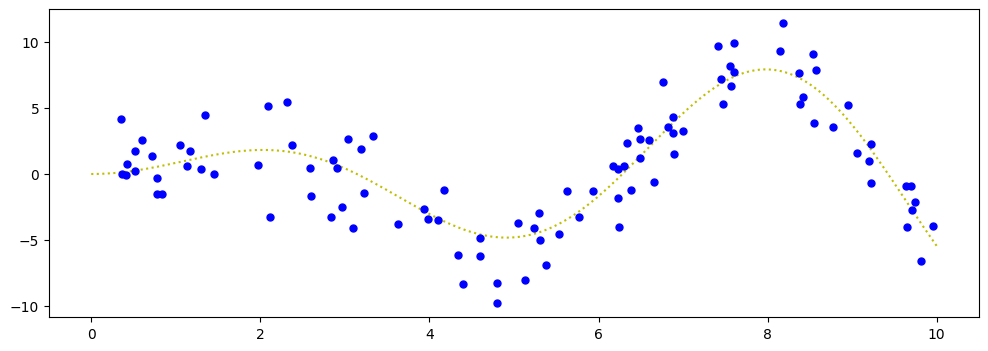

In [7]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_quantile.html
X = np.atleast_2d(np.random.uniform(0, 10.0, size=100)).T
X = X.astype(np.float32)
f = lambda x: x * np.sin(x)
y = f(X).ravel()
dy = 1.5 + 1.0 * np.random.random(y.shape)
y += np.random.normal(0, dy)

xx = np.atleast_2d(np.linspace(0, 10, 1000)).T
plt.plot(xx, f(xx), 'y:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')

Next, we train a GBDT regressor.

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

alpha = 0.95
#clf = GradientBoostingRegressor(loss='ls', alpha=alpha,
clf = GradientBoostingRegressor(loss='squared_error', alpha=alpha,
                                n_estimators=250, max_depth=1,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)
clf.fit(X, y)

GradientBoostingRegressor(alpha=0.95, max_depth=1, min_samples_leaf=9,
                          min_samples_split=9, n_estimators=250)

We may now visualize its predictions

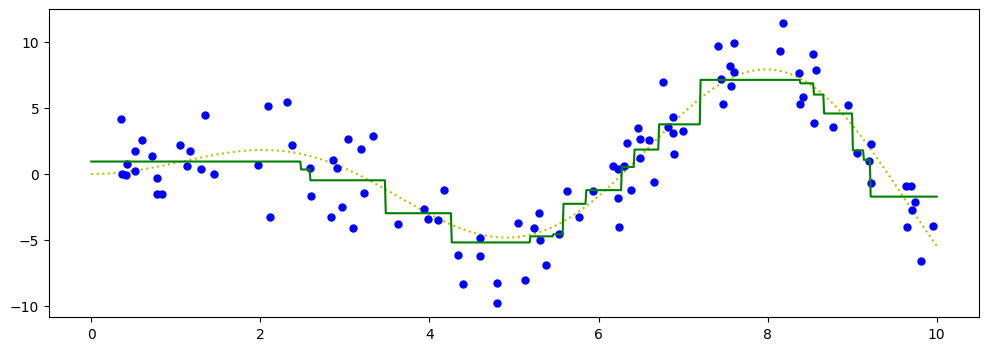

In [15]:
y_pred = clf.predict(xx)
plt.plot(xx, f(xx), 'y:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(xx, y_pred, 'g-', label=u'Prediction')

# Pros and Cons of Gradient Boosting

Gradient boosted decision trees (GBTs) are one of the best off-the-shelf ML algorithms that exist, often on par with deep learning.
* Attain state-of-the-art performance. 
* Require little data pre-processing and tuning.
* Work with any objective, including probabilistic ones.

Their main limitations are:
* GBTs don't work well with unstructured data like images, audio.
* Implementations not as flexible as modern neural net libraries.

## XGBoost, a performance beast 🦖

XGBoost is a highly scalable implementation of gradient boosting for decision trees. The implementation of the algorithm was engineered for efficiency of computing time and memory resources (by actually taking into account which resources are available to train the model). 

<center>
<img width='50%' src='img/xgboost.png'/>
</center>

See a video of the presentation [here](https://www.youtube.com/watch?v=Vly8xGnNiWs&ab_channel=DataScience.LA)

XGBoost has "destroyed" competition (on Kaggle and real-world cases) in tabularized datasets for regression or classification 

When not to use it:
* For image, NLP tasks 
* When few data points are available
* When # of features > # data points 

## Why tree-based models?

<center>
<img width='40%' src='img/boosting-regression.png'/> <br/>
<a href="https://arxiv.org/abs/2207.08815">Why do tree-based models still outperform deep learning on tabular data?</a>
</center>

Some observations from the paper:

1) Neural network solutions tend to prefer smooth solutions 
<center>
<img width='60%' src='img/boosting-electricity.png'/> <br/>
<a href="https://arxiv.org/abs/2207.08815">Why do tree-based models still outperform deep learning on tabular data?</a>
</center>
<br>

2) Uninformative features affect more NN-based models (e.g. one experiment they tried was adding random features to the dataset and showed that there is a much sharper decline in the NNs than in the tree-based methods).